# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
df = pd.read_csv(WHRDataSet_filename, header=0)
df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
df.shape
df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


In [5]:
#this cell and the one below it are for checking missing values in columns 
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

In [6]:
condition = nan_count != 0 # look for all columns with missing values

col_names = nan_count[condition].index # get the column names
print(col_names)

nan_cols = list(col_names) # convert column names to list
print(nan_cols)
nan_col_types = df[nan_cols].dtypes
nan_col_types

Index(['Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Confidence in national government',
       'Democratic Quality', 'Delivery Quality',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')
['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Confidence in national government', 'Democratic Quality', 'Delivery Quality', 'GINI index (World Bank estimate)', 'GINI index (World Bank estimate), average 2000-15', 'gini of household income reported in Gallup, by wp5-year']


Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
GINI index (World Bank estimate)                            float64
GINI index (World Bank estimate), average 2000-15           float64
gini of household income reported in Gallup, by wp5-year    float64
dtype: object

In [7]:
#all of the columns with missing values are float data types, meaning they're numerical values
#this cell is where all of the empty values will be replaced with the mean for each of the columns 
#that could be used as features

#first for the potential label

mean_generosity = df['Generosity'].mean()
df['Generosity'].fillna(value=mean_generosity, inplace=True)

#then for the potential features
mean_capita = df['Log GDP per capita'].mean()
df['Log GDP per capita'].fillna(value=mean_capita, inplace=True)

mean_ss = df['Social support'].mean()
df['Social support'].fillna(value=mean_ss, inplace=True)

mean_le = df['Healthy life expectancy at birth'].mean()
df['Healthy life expectancy at birth'].fillna(value=mean_le, inplace=True)

mean_freedom = df['Freedom to make life choices'].mean()
df['Freedom to make life choices'].fillna(value=mean_freedom, inplace=True)

mean_corruption = df['Perceptions of corruption'].mean()
df['Perceptions of corruption'].fillna(value=mean_corruption, inplace=True)

mean_confidence = df['Confidence in national government'].mean()
df['Confidence in national government'].fillna(value=mean_confidence, inplace=True)

mean_democrat = df['Democratic Quality'].mean()
df['Democratic Quality'].fillna(value=mean_democrat, inplace=True)

mean_delivery = df['Delivery Quality'].mean()
df['Delivery Quality'].fillna(value=mean_delivery, inplace=True)

mean_gini_average = df['GINI index (World Bank estimate), average 2000-15'].mean()
df['GINI index (World Bank estimate), average 2000-15'].fillna(value=mean_gini_average, inplace=True)

mean_gini_household = df['gini of household income reported in Gallup, by wp5-year'].mean()
df['gini of household income reported in Gallup, by wp5-year'].fillna(value=mean_gini_household, inplace=True)



In [8]:
#checking for missing values within altered columns 
#the columns that were not altered will not be used as features since
#one of them has a large number of missing values, and the other two
#might be redundant 
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                            0
Social support                                                0
Healthy life expectancy at birth                              0
Freedom to make life choices                                  0
Generosity                                                    0
Perceptions of corruption                                     0
Positive affect                                              18
Negative affect                                              12
Confidence in national government                             0
Democratic Quality                                            0
Delivery Quality                                              0
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

In [9]:
#next to check for outliers. I'll focus on a few features that I think 
#would be the most at risk if any outliers are present
#I'll choose 'healthy life expectancy at birth', 'perceptions of corruption'
#'democratic quality', 'delivery quality', and 'freedom to make life choices'

#the code below determines if there are outliers using upper and lower bounds
q1_hl = np.quantile(df['Healthy life expectancy at birth'], 0.25)
q3_hl = np.quantile(df['Healthy life expectancy at birth'], 0.75)
med_hl = np.median(df['Healthy life expectancy at birth'])
iqr_hl = q3_hl - q1_hl
ub_hl = q3_hl+(1.5*iqr_hl)
lb_hl = q1_hl - (1.5*iqr_hl)

outliers_hl = [(df['Healthy life expectancy at birth']<= lb_hl) | (df['Healthy life expectancy at birth'] >= ub_hl)]
list(outliers_hl)
res_hl = True in (outliers_hl > 10 for outliers_hl in df['Healthy life expectancy at birth'])
res_hl
#outputs False if there are no outliers

True

In [10]:
q1_pc = np.quantile(df['Perceptions of corruption'], 0.25)
q3_pc = np.quantile(df['Perceptions of corruption'], 0.75)
med_pc = np.median(df['Perceptions of corruption'])
iqr_pc = q3_pc - q1_pc
ub_pc = q3_pc+(1.5*iqr_pc)
lb_pc = q1_pc - (1.5*iqr_pc)

outliers_pc = [(df['Perceptions of corruption']<= lb_pc) | (df['Perceptions of corruption'] >= ub_pc)]
list(outliers_pc)
res_pc = True in (outliers_pc > 10 for outliers_pc in df['Perceptions of corruption'])
res_pc
#outputs False if there are no outliers

False

In [11]:
q1_dmQ = np.quantile(df['Democratic Quality'], 0.25)
q3_dmQ = np.quantile(df['Democratic Quality'], 0.75)
med_dmQ = np.median(df['Democratic Quality'])
iqr_dmQ = q3_dmQ - q1_dmQ
ub_dmQ = q3_dmQ+(1.5*iqr_dmQ)
lb_dmQ = q1_dmQ - (1.5*iqr_dmQ)

outliers_dmQ = [(df['Democratic Quality']<= lb_dmQ) | (df['Democratic Quality'] >= ub_dmQ)]
list(outliers_dmQ)
res_dmQ = True in (outliers_dmQ > 10 for outliers_dmQ in df['Democratic Quality'])
res_dmQ
#outputs False if there are no outliers

False

In [12]:
q1_dq = np.quantile(df['Delivery Quality'], 0.25)
q3_dq = np.quantile(df['Delivery Quality'], 0.75)
med_dq = np.median(df['Delivery Quality'])
iqr_dq = q3_dq - q1_dq
ub_dq = q3_dq+(1.5*iqr_dq)
lb_dq = q1_dq - (1.5*iqr_dq)

outliers_dq = [(df['Delivery Quality']<= lb_dq) | (df['Delivery Quality'] >= ub_dq)]

list(outliers_dq)
res_dq = True in (outliers_dq > 10 for outliers_dq in df['Delivery Quality'])
res_dq
#outputs False if there are no outliers

False

In [13]:
q1_f = np.quantile(df['Freedom to make life choices'], 0.25)
q3_f = np.quantile(df['Freedom to make life choices'], 0.75)
med_f = np.median(df['Freedom to make life choices'])
iqr_f = q3_f - q1_f
ub_f = q3_f+(1.5*iqr_f)
lb_f = q1_f - (1.5*iqr_f)

outliers_f = [(df['Freedom to make life choices']<= lb_f) | (df['Freedom to make life choices'] >= ub_f)]
list(outliers_f)
res_f = True in (outliers_f > 10 for outliers_f in df['Freedom to make life choices'])
res_f
#outputs False if there are no outliers

False

In [14]:
#next, dealing with the features that output 'True' when checking for outliers
#this will be taken care of using winsorization
#only healthy life expectancy came out as true
df['Healthy life expectancy at birth'] = stats.mstats.winsorize(df['Healthy life expectancy at birth'], limits=[0.01, 0.01])


## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [15]:
#remove the column with too many missing values/ones that can't be used at this time
#then save features to be used in X and the label in y
X = df.drop(columns = ['Generosity', 'GINI index (World Bank estimate)', 'Positive affect', 'Negative affect', 'country', 'year'], axis=1)
y = df['Generosity']

#inspect the changed data
X.head()


,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,3.723590,7.168690,0.450662,49.209663,0.718114,0.881686,0.612072,-1.929690,-1.655084,1.774662,0.476600,0.386948,0.445204
1,4.401778,7.333790,0.552308,49.624432,0.678896,0.850035,0.611545,-2.044093,-1.635025,1.722688,0.391362,0.386948,0.441906
2,4.758381,7.386629,0.539075,50.008961,0.600127,0.706766,0.299357,-1.991810,-1.617176,1.878622,0.394803,0.386948,0.327318
3,3.831719,7.415019,0.521104,50.367298,0.495901,0.731109,0.307386,-1.919018,-1.616221,1.785360,0.465942,0.386948,0.336764
4,3.782938,7.517126,0.520637,50.709263,0.530935,0.775620,0.435440,-1.842996,-1.404078,1.798283,0.475367,0.386948,0.344540


In [16]:
#split data set for training/testing
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.30, random_state=1234)

In [17]:
#this cell is going to create the decisiontreeregressor 

def train_test_DT(X_train, X_test, y_train, y_test, leaf, depth):
# 1. Create the DecisionTreeRegressor model object using the hyperparameter values above and assign to 
# variable 'dt_model'
# YOUR CODE HERE
    dt_model = DecisionTreeRegressor(max_depth=depth, min_samples_leaf = leaf)

# 2. Fit the model to the training data below
# YOUR CODE HERE
    dt_model.fit(X_train, y_train)

# 3.  Call predict() to use the fitted model to make predictions on the test data. Save the results to variable
# 'y_dt_pred'
# YOUR CODE HERE
    y_dt_pred = dt_model.predict(X_test)

# 4: Compute the RMSE and R2 (on y_test and y_dt_pred) and save the results to dt_rmse and dt_r2
# YOUR CODE HERE
    dt_rmse = mean_squared_error(y_test, y_dt_pred, squared=False)

    dt_r2 = r2_score(y_test, y_dt_pred)

    return dt_rmse, dt_r2

In [18]:
#this cell is to find the best max depth for the decisiontree regressor
max_depth_range = [2**i for i in range(6) ]

dt_r_scores = []

for md in max_depth_range:
    dt_scores = train_test_DT(X_train, X_test, y_train, y_test, 1, md)
    print('Max depth = ' + str(md) + ' r2 and rmse scores = ' + str(dt_scores))
    dt_r_scores.append(float(dt_scores[0]))
    dt_r_scores.append(float(dt_scores[1]))

Max depth = 1 r2 and rmse scores = (0.14935470369495238, 0.15656624039284572)
Max depth = 2 r2 and rmse scores = (0.13966587832790364, 0.26244603021900303)
Max depth = 4 r2 and rmse scores = (0.13700213415074508, 0.29031138871085027)
Max depth = 8 r2 and rmse scores = (0.1413334897796541, 0.24472808383174183)
Max depth = 16 r2 and rmse scores = (0.13282740515495234, 0.3329036748362627)
Max depth = 32 r2 and rmse scores = (0.13286038018280008, 0.33257241412439986)


In [19]:
#it looks like the best max_depth was at 32
#now to find the best min_sample_leaf
min_sample_leaf_range = [2**i for i in range(50) ]

dt_r_scores_msl = []

for lf in min_sample_leaf_range:
    dt_scores = train_test_DT(X_train, X_test, y_train, y_test, lf, 32)
    print('Min sample leaf = ' + str(lf) + ' r2 and rmse scores = ' + str(dt_scores))
    dt_r_scores_msl.append(float(dt_scores[0]))
    dt_r_scores_msl.append(float(dt_scores[1]))


Min sample leaf = 1 r2 and rmse scores = (0.1325327084428536, 0.33586048951821057)
Min sample leaf = 2 r2 and rmse scores = (0.1317572878544172, 0.34360923192649195)
Min sample leaf = 4 r2 and rmse scores = (0.13437623211931615, 0.31725568924263925)
Min sample leaf = 8 r2 and rmse scores = (0.13343367492378608, 0.3268000648699919)
Min sample leaf = 16 r2 and rmse scores = (0.13451462723567711, 0.3158486378013714)
Min sample leaf = 32 r2 and rmse scores = (0.13444093036553895, 0.31659808792906274)
Min sample leaf = 64 r2 and rmse scores = (0.1336460846217282, 0.3246550589802646)
Min sample leaf = 128 r2 and rmse scores = (0.13893978733380175, 0.27009484536394057)
Min sample leaf = 256 r2 and rmse scores = (0.14463539368397368, 0.20902576857129385)
Min sample leaf = 512 r2 and rmse scores = (0.1578420774304418, 0.057982984304025376)
Min sample leaf = 1024 r2 and rmse scores = (0.16277737606157994, -0.001846667759094478)
Min sample leaf = 2048 r2 and rmse scores = (0.16277737606157994, -0

In [20]:
#it looks like the best value was somewhere below 100 
#here I try out a gridsearch as well just to verify if there's a better way to 
#hyperparameter values

param_grid = {'max_depth': [4, 8], 
             'min_samples_leaf': [25, 50]}

print('Running Grid Search...')

# 1. Create a DecisionTreeRegressor model object without supplying arguments. 
#    Save the model object to the variable 'dt_regressor'

dt_regressor = DecisionTreeRegressor()


# 2. Run a Grid Search with 3-fold cross-validation and assign the output to the object 'dt_grid'.
#    * Pass the model and the parameter grid to GridSearchCV()
#    * Set the number of folds to 3
#    * Specify the scoring method

dt_grid = GridSearchCV(dt_regressor, param_grid, cv=3, scoring='neg_root_mean_squared_error')


# 3. Fit the model (use the 'grid' variable) on the training data and assign the fitted model to the 
#    variable 'dt_grid_search'

dt_grid_search = dt_grid.fit(X_train, y_train)


print('Done')

rmse_DT = -1 * dt_grid_search.best_score_
print("[DT] RMSE for the best model is : {:.2f}".format(rmse_DT) )

Running Grid Search...
Done
[DT] RMSE for the best model is : 0.13


In [21]:
#now to find the best features for the decisiontree model
model_dt_test = DecisionTreeRegressor(max_depth=8, min_samples_leaf = 50)
model_dt_test.fit(X_train, y_train)
fi = model_dt_test.feature_importances_
fi[:5]

array([0.02822332, 0.16834715, 0.        , 0.        , 0.48785914])

Text(0, 0.5, 'Normalized importance')

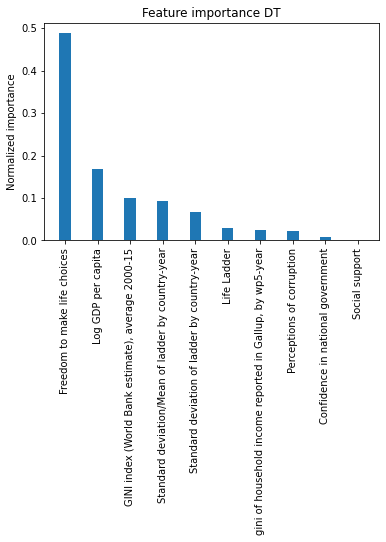

In [22]:
#obtain feature importance in decisiontree regressor 
fi = model_dt_test.feature_importances_
names_sorted = [x for _,x in sorted(zip(fi, X_train.columns.values), reverse = True)]

fig, ax = plt.subplots()

ax.bar(np.arange(10), sorted(model_dt_test.feature_importances_, reverse=True)[:10], width=0.35)
ax.set_xticks(np.arange(10))
ax.set_xticklabels(names_sorted[:10], rotation=90)
plt.title('Feature importance DT')
ax.set_ylabel('Normalized importance')


In [23]:
#It looks like gini of houselhold income reported by wp5-year can be dropped
#so can a few others
X = df.drop(columns = ['Generosity', 'GINI index (World Bank estimate)', 'Positive affect', 
                       'Negative affect', 'country', 'year', 'gini of household income reported in Gallup, by wp5-year',
                      'Standard deviation of ladder by country-year', 'Life Ladder'], axis=1)
y = df['Generosity']

#inspect the changed data
X.head()


,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-15"
0,7.168690,0.450662,49.209663,0.718114,0.881686,0.612072,-1.929690,-1.655084,0.476600,0.386948
1,7.333790,0.552308,49.624432,0.678896,0.850035,0.611545,-2.044093,-1.635025,0.391362,0.386948
2,7.386629,0.539075,50.008961,0.600127,0.706766,0.299357,-1.991810,-1.617176,0.394803,0.386948
3,7.415019,0.521104,50.367298,0.495901,0.731109,0.307386,-1.919018,-1.616221,0.465942,0.386948
4,7.517126,0.520637,50.709263,0.530935,0.775620,0.435440,-1.842996,-1.404078,0.475367,0.386948


In [24]:
#now to check the dt performance again by retraining it with those features removed
model_dt_best = train_test_DT(X_train, X_test, y_train, y_test, 50, 8)
dt_rmse, dt_r2 = model_dt_best

In [25]:
#it seems like there's still work to be done for the decisiontree model, it's
#improved but there's still room for improvements

#for now I'll check to see how a gbdtregressor model does with this data

In [26]:
print('Running Grid Search...')

# 1. Create a DecisionTreeRegressor model object without supplying arguments. 
#    Save the model object to the variable 'dt_regressor'

gbdt_regressor =GradientBoostingRegressor()


# 2. Run a Grid Search with 3-fold cross-validation and assign the output to the object 'dt_grid'.
#    * Pass the model and the parameter grid to GridSearchCV()
#    * Set the number of folds to 3
#    * Specify the scoring method

gbdt_grid = GridSearchCV(gbdt_regressor, param_grid, cv=3, scoring='neg_root_mean_squared_error')


# 3. Fit the model (use the 'grid' variable) on the training data and assign the fitted model to the 
#    variable 'dt_grid_search'

gbdt_grid_search = gbdt_grid .fit(X_train, y_train)


print('Done')

rmse_GBDT = -1 * gbdt_grid_search.best_score_
print("[DT] RMSE for the best model is : {:.2f}".format(rmse_GBDT ) )

Running Grid Search...
Done
[DT] RMSE for the best model is : 0.10


In [27]:
gbdt_best_params = gbdt_grid_search.best_estimator_

gbdt_best_params

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=25, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
#it looks like max_depth = 8 and n_estimators=100  were the best

In [29]:
#this cell is to create the gbdtregressor model 
def train_test_gbdt(X_train, X_test, y_train, y_test, estimate, depth):

    print('Begin GBDT Implementation...')

# 1. Create the  GradientBoostingRegressor model object below and assign to variable 'gbdt_model'
# YOUR CODE HERE
    gbdt_model = GradientBoostingRegressor(max_depth=depth, n_estimators=estimate)

# 2. Fit the model to the training data below
# YOUR CODE HERE
    gbdt_model.fit(X_train, y_train)

# 3. Call predict() to use the fitted model to make predictions on the test data. Save the results to variable
# 'y_gbdt_pred'
# YOUR CODE HERE
    y_gbdt_pred = gbdt_model.predict(X_test)

# 4. Compute the RMSE and R2 (on y_test and y_gbdt_pred) and save the results to gbdt_rmse and gbdt_r2
# YOUR CODE HERE
    gbdt_rmse = mean_squared_error(y_test, y_gbdt_pred, squared=False)

    gbdt_r2 = r2_score(y_test, y_gbdt_pred)
    print('Done')

    return gbdt_rmse, gbdt_r2



In [30]:
#now to use the best parameters that were found from the gridsearch
gbdt_best = train_test_gbdt(X_train, X_test, y_train, y_test, depth=8, estimate=100)


gbdt_rmse, gbdt_r2 = gbdt_best

Begin GBDT Implementation...
Done


In [31]:
#more work needs to be done there as well, but the scores do look better than the
#dt model

#I'll see how the rf model does next

In [32]:
print('Running Grid Search...')

# 1. Create a DecisionTreeRegressor model object without supplying arguments. 
#    Save the model object to the variable 'dt_regressor'

rf_regressor =RandomForestRegressor()


# 2. Run a Grid Search with 3-fold cross-validation and assign the output to the object 'dt_grid'.
#    * Pass the model and the parameter grid to GridSearchCV()
#    * Set the number of folds to 3
#    * Specify the scoring method

rf_grid = GridSearchCV(rf_regressor, param_grid, cv=3, scoring='neg_root_mean_squared_error')


# 3. Fit the model (use the 'grid' variable) on the training data and assign the fitted model to the 
#    variable 'dt_grid_search'

rf_grid_search = rf_grid .fit(X_train, y_train)


print('Done')

rmse_rf = -1 * rf_grid_search.best_score_
print("[DT] RMSE for the best model is : {:.2f}".format(rmse_rf) )

Running Grid Search...
Done
[DT] RMSE for the best model is : 0.13


In [33]:
rf_best_params = rf_grid_search.best_estimator_

rf_best_params

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=25,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [34]:
#this cell is going to create the randomforestregressor

def train_test_rf(X_train, X_test, y_train, y_test):
    print('Begin RF Implementation...')

# 1. Create the  RandomForestRegressor model object below and assign to variable 'rf_model'
# YOUR CODE HERE
    rf_model = RandomForestRegressor(max_depth=8, n_estimators=100)

# 2. Fit the model to the training data below
# YOUR CODE HERE
    rf_model.fit(X_train, y_train)

# 3. Call predict() to use the fitted model to make predictions on the test data. Save the results to variable
# 'y_rf_pred'
# YOUR CODE HERE
    y_rf_pred = rf_model.predict(X_test)

# 4. Compute the RMSE and R2 (on y_test and y_rf_pred) and save the results to rf_rmse and rf_r2
# YOUR CODE HERE
    rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)
    rf_r2 = r2_score(y_test, y_rf_pred)


    print('End')
    
    return rf_rmse, rf_r2


In [35]:
#now to call the rf regressor using those hyperparameters
rf_best = train_test_rf(X_train, X_test, y_train, y_test)
rf_best
rf_rmse, rf_r2 = rf_best

Begin RF Implementation...
End


In [36]:
#it's comparable to the gbdt model

#I thought it might be interesting to experiment with a stacking model as well, so i included
#that in here
estimators = [("DT", DecisionTreeRegressor(max_depth=8, min_samples_leaf=50)),
              ("RF", RandomForestRegressor(max_depth=8, n_estimators=100,min_samples_leaf=25)),
              ("GBDT", GradientBoostingRegressor(max_depth=8, n_estimators=100))]

stacking_model = StackingRegressor(estimators=estimators, cv=5, passthrough=False)
#fit the stacking model
stacking_model.fit(X_train, y_train)

#call predict() to the fitted model

y_st_pred= stacking_model.predict(X_test)

#Compute the RMSE and R2
st_rmse = mean_squared_error(y_test, y_st_pred, squared=False)
st_r2 = r2_score(y_test, y_st_pred)

st_rmse


0.09988506128639577

In [37]:
st_r2 

0.6227630265053903

In [38]:
#the ensemble methods seem to be doing alright but it can be improved as well
#with further work

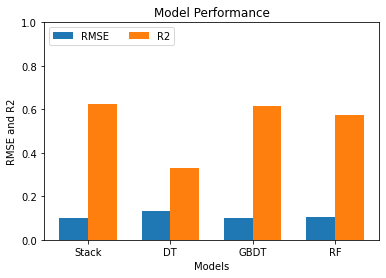

In [39]:
#this cell is going to visualize model performance

RMSE_Results = [st_rmse, dt_rmse, gbdt_rmse, rf_rmse]
R2_Results = [st_r2, dt_r2, gbdt_r2, rf_r2]
labels = ['Stack', 'DT', 'GBDT', 'RF']

rg= np.arange(4)
width = 0.35

# 1. Create bar plot with RMSE results
# YOUR CODE HERE
plt.bar(rg, RMSE_Results, width, label="RMSE")
# 2. Create bar plot with R2 results
# YOUR CODE HERE
plt.bar(rg+width, R2_Results, width, label='R2')

# 3. Call plt.xticks() to add labels under the bars indicating which model the pair of RMSE 
# and R2 bars correspond to
# YOUR CODE HERE
plt.xticks(rg + width/2, labels)

# 4. Label the x and y axis of the plot: the x axis should be labeled "Models" and the y axis
# should be labeled "RMSE and R2"
# YOUR CODE HERE
plt.xlabel("Models")
plt.ylabel("RMSE and R2")

plt.ylim([0,1])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()
